<a href="https://colab.research.google.com/github/nasibehmohammadi/Thesis/blob/main/1SimpleRNN_d1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9386 - loss: 0.2467 - val_accuracy: 0.9437 - val_loss: 0.2176
Epoch 2/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9396 - loss: 0.2293 - val_accuracy: 0.9437 - val_loss: 0.2170
Epoch 3/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9406 - loss: 0.2260 - val_accuracy: 0.9437 - val_loss: 0.2166
Epoch 4/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9396 - loss: 0.2276 - val_accuracy: 0.9437 - val_loss: 0.2158
Epoch 5/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9393 - loss: 0.2279 - val_accuracy: 0.9437 - val_loss: 0.2160
Epoch 6/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9411 - loss: 0.2218 - val_accuracy: 0.9437 - val_loss: 0.2149
Epoch 7/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9410 - loss: 0.2210 - val_accuracy: 0.9437 - val_loss: 0.2158
Epoch 8/20
820/820 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9442 - loss: 0.2120 - val_accuracy: 0.

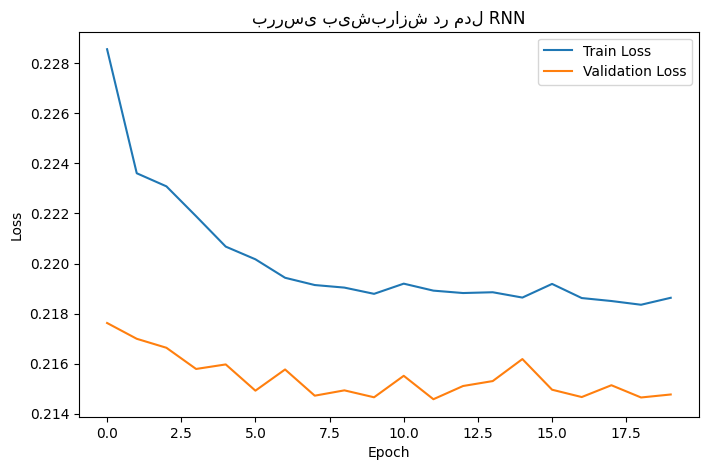

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt

# 1️⃣ بارگذاری دیتاست (داده‌های دسترسی)
file_path = "/content/d1.csv"  # فایل داده‌ها را تغییر دهید

# خواندن دیتاست
df = pd.read_csv(file_path)

# 2️⃣ پیش‌پردازش داده‌ها
feature_columns = df.columns[1:]  # ستون‌های ویژگی
target_column = df.columns[0]  # ستون هدف

X_data = df[feature_columns].values
y_data = df[target_column].values

# مقیاس‌بندی داده‌ها
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_data)

# تغییر شکل داده‌ها برای RNN
X_reshaped = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# تقسیم داده‌ها به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y_data, test_size=0.2, random_state=42)

# 3️⃣ تعریف مدل Simple RNN
model = Sequential([
    SimpleRNN(64, return_sequences=True, input_shape=(1, X_train.shape[2])),
    Dropout(0.2),
    SimpleRNN(32, return_sequences=False),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(0.001), metrics=['accuracy'])

# 4️⃣ آموزش مدل
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)

# 5️⃣ ارزیابی مدل
y_pred = (model.predict(X_test) > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f'✅ دقت مدل: {accuracy:.4f}')
print(f'✅ F1-Score مدل: {f1:.4f}')

# 6️⃣ بررسی بیش‌برازش (Overfitting)
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('بررسی بیش‌برازش در مدل RNN')
plt.legend()
plt.show()
